# Distribución de datos y estadística

In [12]:
import numpy as np
from scipy import stats
import pandas as pd

In [13]:
muestra = np.array([[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 

In [14]:
muestra.mean() # Media o promedio

1.6415

In [15]:
# Mediana

np.median(muestra)

1.66

In [19]:
# Moda

print(stats.mode(muestra))

def moda_profe(array):
    numeros = list(array.flatten())
    unicos = list(set(numeros))

    moda = 0 
    maximo = 0 

    for n in unicos:
        conteo = numeros.count(n)

        if conteo > maximo:
            maximo = conteo
            moda = n
    return moda

print(moda_profe(muestra))

ModeResult(mode=array([1.4 , 1.42, 1.45, 1.48]), count=array([1., 1., 1., 1.]))
1.8


In [20]:
# Varianza

np.var(muestra)

0.017642750000000006

In [21]:
# Desviación estandar

np.std(muestra)

0.13282601401833907

Histogramas

In [22]:
import matplotlib.pyplot as plt

In [27]:
lista_a = muestra.tolist()
lista_b = list(muestra.flatten())

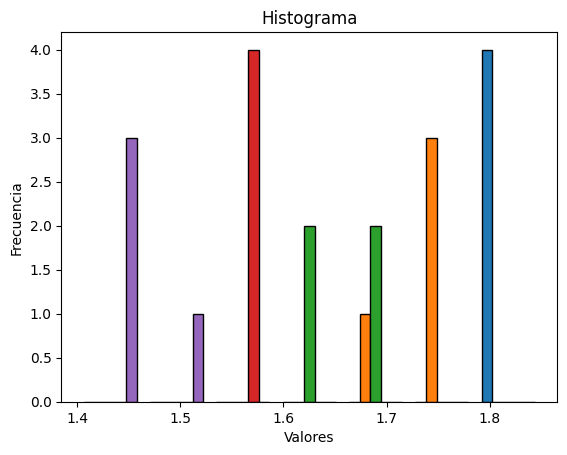

In [26]:
plt.hist(lista_a,bins=7,edgecolor = "black")
plt.title("Histograma")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

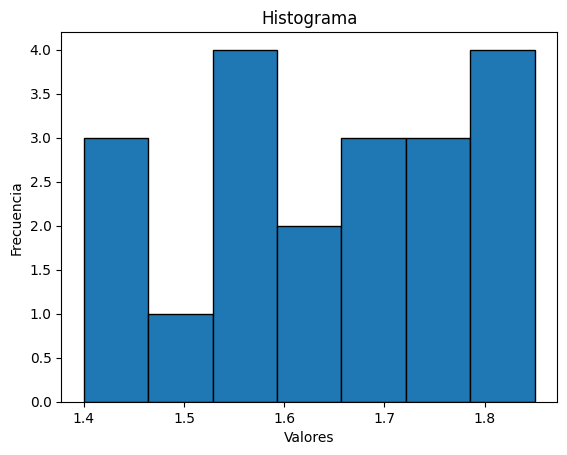

In [28]:
plt.hist(lista_b,bins=7,edgecolor = "black")
plt.title("Histograma")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

# Espacios muestrales

In [29]:
import numpy as np
import math as m
import pandas as pd

In [30]:
def combinatories(n_poss,total_n): # Se usa cuando los elementos no se repiten. 
    '''
    This funtion give as an answer the total of combinations that a n number of data.
    '''
    ans = (m.factorial(total_n))/((m.factorial(n_poss))*(m.factorial(total_n-n_poss)))

    return ans

def permutations(n_poss,total_n): # Se usa cuando los elementos se repiten (se vuelve a agregar a n)
    '''
    This funtion gives as an answer the total number of permutations possible for a n number of data.
    '''
    ans = (m.factorial(total_n))/m.factorial(total_n-n_poss)

    return ans

In [31]:
def probability(n,total): # Definir la probabilidad de que "n" ocurra en "total" numero de eventos. 
    ans = n / total
    return ans

# Reglas de adición y multiplicación

In [34]:
# Tipos de sucesos
# Simples 
# Sucesos excluyentes -- No pueden pasar al tiempo --> La probabilidad de que ocurran 
# Sucesos compatibles -- Cuando pueden ocurrir el mismo tiempo --> Adición 
# Sucesos independientes -- La ocurrencia de A no afecta la aparición B --> P(A) = P(A|B) (a dado b) o p(AnB) = P(A)*P(B)
# Sucesos dependiente --> La ocurrencia de A Afecta la aparición B --> Reglas de multiplicación

In [ ]:
# Probabilidades
    # Excluyentes:
        # La probabilidad de P(A n B) siempre será 0.
        # La probabilidad de P(A|B) siempre será 0.
        
        # Por tanto, cuando hay dos eventos excluyentes, y se quiere conocer su probabilidad conjunta (es decir, una probabilidad de dos eventos excluyentes):
            #  P (P(AnB) u P(BnA)) = P(AnB) + P(BnA); 
                #   donde P(AnB) y P(BnA) son condicionales para sí mismos

    # Compatibles (regla de la adición):
        #  P(AuB) = P(A) + P(B) - P(AnB)
    
    # Independientes (con reposición):
        # P(A y B) =  P(A) * P(B)
        
        # Se puede verificar que son independientes ya que:
            # P(A | B) =  P(A)
            # P(A n B)  = P(A) * P(B)
    
    # Dependientes o condicionales (sin reposición):
        
        # Obtención de la intersección:
            # P(A n B) = P(B) * P(A|B)
            # P(B n A) = P(A) * P(B|A)

            # P(A|B) = P(A n B) / P(B)
            # P(B|A) = P(B n A) / P(A)

        # Obtención de la probabilidad (sin reposición):
            # P (A y B) = P(A) * P(B|A);
                # donde P(B|A) = B / N - 1; donde N es el total de la muestra.
        
            # Condicionales del mismo grupo:
                # P (A y A2) = P(A) * P(A-1/N-1)

# Distribuciones muestrales de probabilidad

In [1]:
from math import e, factorial
from statistics import NormalDist
from scipy import stats

In [5]:
#DISTRIBUCIÓN BINOMIAL
def p_binomial(k,n,p):
  num_exitos = factorial(n) 
  num_eventos = factorial (k) * factorial(n-k) 
  exitos_fracaso = pow(p,k) * pow(1-p,(n-k)) 

  binomial = (num_exitos / num_eventos) * exitos_fracaso

  return binomial

# OR 

stats.binom(n=3,p=0.3).pmf(2)
# donde n = es el tamaño de la muestra
# donde p es la probabilidad de éxito 
# pmf(x) la probabilidad de que se cumplan los individuos x con éxito
# x el número de individuos que quiero con exito


In [6]:
#DISTRIBUCIÓN DE POISSON
def p_poisson(lamba_np,x):
     probabilidad = (pow(e,-lamba_np) * pow(lamba_np,x))/factorial(x)
     return probabilidad


stats.poisson(mu=4).pmf(5)
# Donde mu es lamda o el espacio muestral para el periodo de tiempo definido
# .pmf(x) la proabilidad de que me den el número x de casos de éxito
# x el número de casos de éxito cuya probabilidad quiero obtener

In [9]:
#DISTRIBUCIÓN HIPERGEOMÉTRICA

def p_hipergeo(N,X,n,x):
  Xx = factorial(X)/(factorial(x)*factorial(X-x))
  NX_nx= factorial(N-X)/(factorial(n-x)*factorial((N-X)-(n-x)))
  Nn = factorial(N)/(factorial(n)*factorial(N-n))
  hipergeometrica = (Xx * NX_nx)/Nn

  return hipergeometrica

# Donde N es el tamaño de la población, 
# X el tamaño del grupo que cumple la condición de éxito
# n el tamaño de la muestra que se toma
# x el número de individuos que cumplan la condición de éxito

# OR 

stats.hypergeom(M=,n=,N=).pmf(x)
# donde M es el tamaño de la población
# n es el tamaño de la muestra
# N es el tamaño del grupo o población que cumple la condición de éxito
# x es el número de individuos que cumplen la condición de éxito.
# .pmf(x) probabilidad de que ocurra x

In [ ]:
# probabilidad NORMAL

print(stats.norm(loc=78,scale=25).sf(90)) # Por encima de...
print(stats.norm(loc=78,scale=25).cdf(90)) #Por debajo de...

# Donde LOC es el promedio o la media
# scale es la desviación estándar 
# .sf (x) es la probabilidad de los datos por encima de x
# .cdf (x) es la probabilidad de los datos por debajo de x

In [11]:
p_hipergeo(100,3,5,1)

0.1380643166357452